# I. Bài tập

Từ một trong các bộ dữ liệu:

* [BreastCancer](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) về chuẩn đoán ung thư vú. 
* [diabetes](https://archive.ics.uci.edu/ml/datasets/diabetes) chuẩn đoán bệnh tiểu đường.
* [hmeq](https://www.kaggle.com/ajay1735/hmeq-data) phân loại hồ sơ cho vay mua nhà.
* [BonstonHousing](https://github.com/phamdinhkhanh/datasets/blob/master/BostonHousing.csv) dự báo giá nhà ở Bonston. 
* [churn customer](https://archive.ics.uci.edu/ml/datasets/Iranian+Churn+Dataset) dự đoán khách hàng rời bỏ.

Bạn hãy thực hiện các bài tập sau: 

1. Thống kê mô tả và vẽ biểu đồ phân phối trên các trường của tập dữ liệu này. Đánh giá sơ bộ về tính chất phân phối của các biến.

2. Hãy tạo thành một pipeline hoàn chỉnh để xử lý dữ liệu từ thô sang tinh.

3. Phân chia tập train/test và lựa chọn metric cho bài toán.

4. Lựa chọn một lớp mô hình phù hợp, thực hiện cross validation để huấn luyện và đánh giá mô hình đó trên tập train.

5. Triển khai lại quá trình ở bài 4 trên nhiều lớp mô hình khác nhau.

6. Vẽ biểu đồ thể hiện kết quả của các mô hình và kết luận đâu là mô hình tốt nhất. 

7. Dựa vào lớp mô hình tốt nhất được lựa chọn, thực hiện grid search trên không gian tham số của nó.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split,RepeatedStratifiedKFold,cross_val_score,KFold
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression,ElasticNet, SGDRegressor

**Download & Read data**

In [ ]:
url = 'https://raw.githubusercontent.com/phamdinhkhanh/datasets/master/BostonHousing.csv'
df = pd.read_csv(url)

In [ ]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


**Data description**

The Boston data frame has 506 rows and 14 columns.

crim
per capita crime rate by town.

zn
proportion of residential land zoned for lots over 25,000 sq.ft.

indus
proportion of non-retail business acres per town.

chas
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

nox
nitrogen oxides concentration (parts per 10 million).

rm
average number of rooms per dwelling.

age
proportion of owner-occupied units built prior to 1940.

dis
weighted mean of distances to five Boston employment centres.

rad
index of accessibility to radial highways.

tax
full-value property-tax rate per \$10,000.

ptratio
pupil-teacher ratio by town.

black
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

lstat
lower status of the population (percent).

medv
median value of owner-occupied homes in \$1000s.


# Thống kê mô tả và vẽ biểu đồ phân phối trên các trường của tập dữ liệu này. 

Đánh giá sơ bộ về tính chất phân phối của các biến

number of numeric field:  14


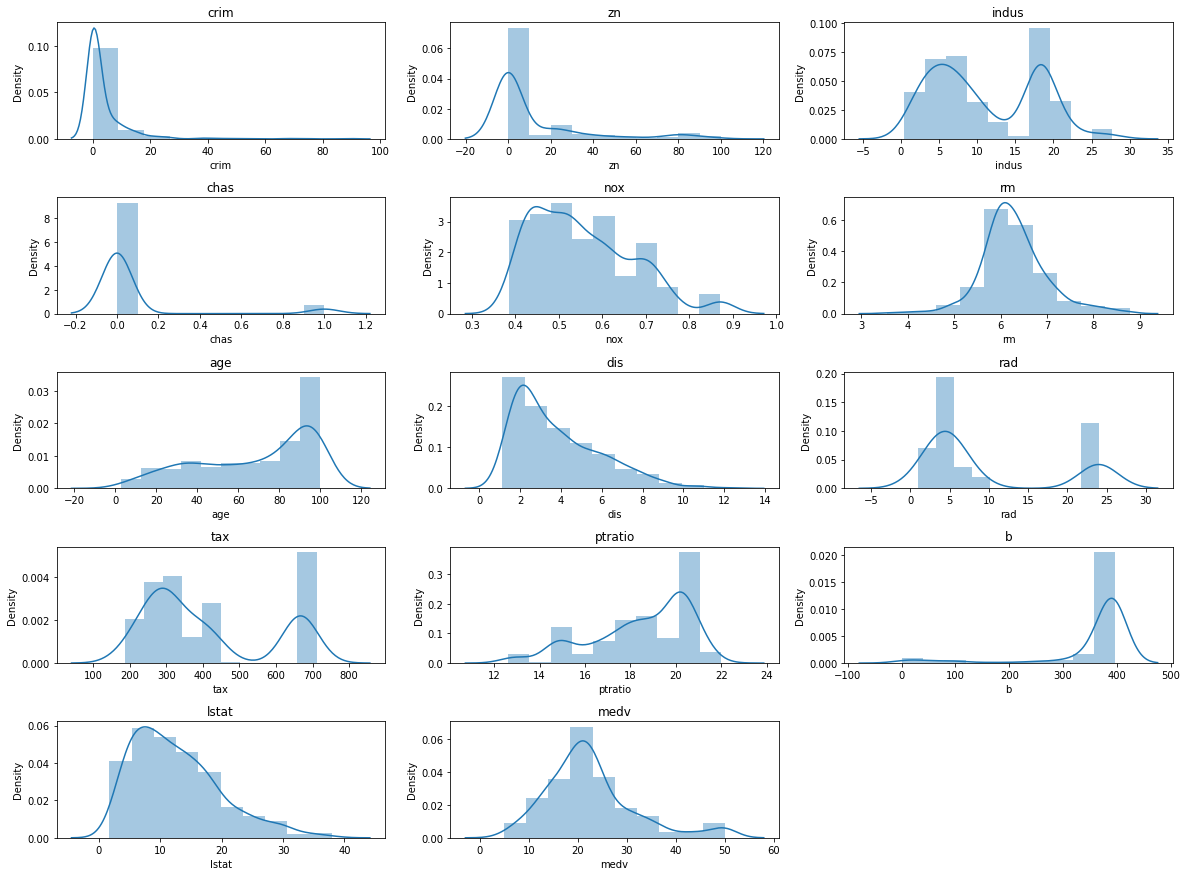

In [ ]:
# sns.pairplot(data)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

numeric_cols = df.select_dtypes(include=['float','int']).columns

def _plot_numeric_classes(df, col, bins=10, hist=True, kde=True):
    sns.distplot(df[col],
                 bins = bins,
                 hist = hist,
                 kde = kde)

def _distribution_numeric(df, numeric_cols, row=5, col=3, figsize=(20, 15), bins = 10):
    '''
    numeric_cols: list các tên cột
    row: số lượng dòng trong lưới đồ thị
    col: số lượng cột trong lưới đồ thị
    figsize: kích thước biểu đồ
    bins: số lượng bins phân chia trong biểu đồ distribution
    '''
    print('number of numeric field: ', len(numeric_cols))
    assert row*(col-1) < len(numeric_cols)
    plt.figure(figsize = figsize)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
    for i in range(1, len(numeric_cols)+1, 1):
      try:
        plt.subplot(row, col, i)
        _plot_numeric_classes(df, numeric_cols[i-1], bins = bins)
        plt.title(numeric_cols[i-1])
      except:
        print('Error {}'.format(numeric_cols[i-1]))
        break

_distribution_numeric(df, numeric_cols)

Nhận xét:
- Dataset chỉ bao gồm các biến số, không bao gồm dữ liệu text
- Bao gồm 1 biến phân loại (categorical) chas, còn lại là biến liên tục (continuous) => one-hot biến chas sau
- Dataset Boston có phần lớn ngôi nhà đã được xây dựng lâu đời (age 100 tuổi)
- Dân cư không quá đông, 25000 sq ft ( 2300m2) phần lớn < 10 ngôi nhà (hay 230m2 1 ngôi nhà)
- Giá nhà có phân bố hình chuông, đỉnh chuông là 20000 $

# 2. Pipeline dữ liệu

In [ ]:
# Pipeline xử lý cho biến phân loại
cat_pl= Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')), # Xử lý missing data bằng cách thay thế most frequent
        ('onehot', OneHotEncoder()), # Biến đổi giá trị của biến phân loại thành véc tơ OneHot
    ]
)
# Pipeline xử lý cho biến liên tục
num_pl = Pipeline(
    steps=[
           ('imputer', KNNImputer(n_neighbors=7)), # Xử lý missing data bằng cách dự báo KNN với n=7. Tức là lấy trung bình giá trị của 7 láng giềng gần nhất.
           ('scaler', MinMaxScaler()) # Xử lý missing data bằng MinMax scaler
    ]
)

# Phân chia train/ test & lựa chọn Metrics

- Phân chia train/ test theo tỉ lệ thông thường 80/20
- Bài toán là regression problem nên ta chọn metric đánh giá tương ứng: MAE/ MSE... Ở đây ta chọn MSE


In [ ]:
# Chia train/test theo tỷ lệ 80:20.
df_train, df_test = train_test_split(df, test_size=0.2)
X_train = df_train.copy()
y_train = X_train.pop("medv")


X_test = df_test.copy()
y_test = X_test.pop("medv")
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


# Lấy list names của các biến phân loại và biến liên tục.
cat_names = ['chas']
num_names = list(X_train.columns)
num_names.remove('chas')

pipeline hoàn chỉnh

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pl, num_names), # áp dụng pipeline cho biến liên tục
        ('cat', cat_pl, cat_names), # áp dụng pipeline cho biến phân loại
    ]
)
# Completed training pipeline
completed_pl = Pipeline(
    steps=[
            ("preprocessor", preprocessor), 
            ("regression", RandomForestRegressor())
    ]
)

In [ ]:

# training
completed_pl.fit(X_train, y_train)

# MSE metric on train
y_train_pred = completed_pl.predict(X_train)
print(f"MSE on train: {mean_squared_error(list(y_train), list(y_train_pred)):.2f}")
# MSE metric on test
y_pred = completed_pl.predict(X_test)
print(f"MSE on test: {mean_squared_error(list(y_test), list(y_pred)):.2f}")

MSE on train: 1.56
MSE on test: 26.52


Nhận xét: đã fit tốt trên train dataset, test dataset tuning sau

# Lựa chọn một lớp mô hình phù hợp. Thực hiện cross validation để huấn luyện và đánh giá mô hình đó trên tập train.

In [ ]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(completed_pl, X_train, y_train, scoring='neg_mean_squared_error', cv=folds)
scores   

array([ -9.54114689, -10.64195569,  -8.43747483, -18.9767969 ,
       -12.40437774])

In [ ]:
# list các mô hình được lựa chọn
models = [LinearRegression(),ElasticNet(), SGDRegressor(), RandomForestRegressor()]

# Xác định KFold
cv = KFold(n_splits=5)

all_scores = []
# Đánh giá toàn bộ các mô hình trên tập K-Fold đã chia
for model in models:
  completed_pl = Pipeline(
    steps=[("preprocessor", preprocessor), ('regression', model)]
  )

  scores = cross_val_score(completed_pl, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
  all_scores.append(scores)

Vẽ biểu đồ phân phối score giữa các mô hình.

Text(0.5, 1.0, 'Scores Metrics')

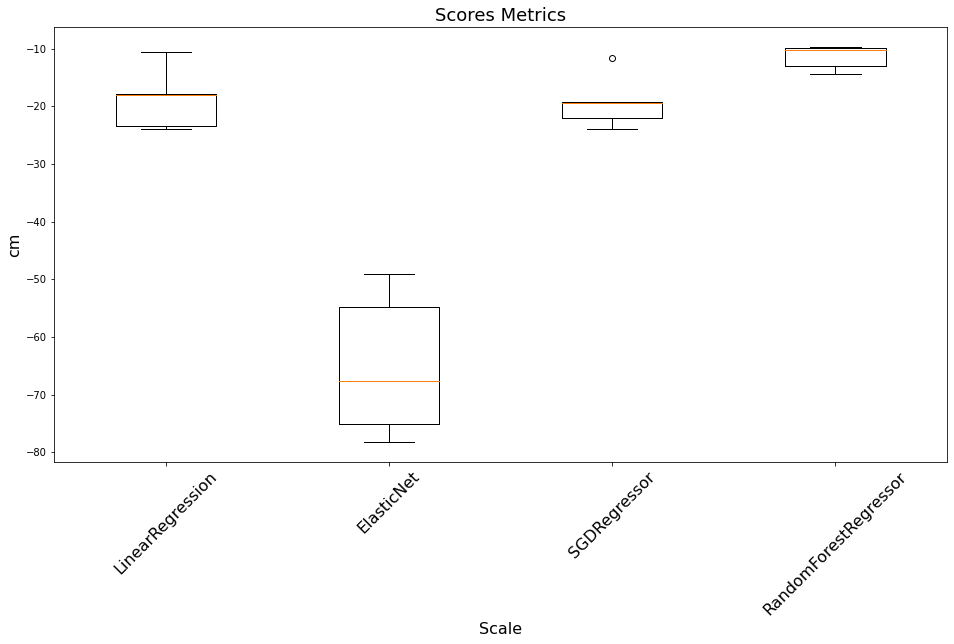

In [ ]:
import matplotlib.pyplot as plt
model_names = ['LinearRegression', 'ElasticNet', 'SGDRegressor', 'RandomForestRegressor']

# Draw bboxplot 
plt.figure(figsize=(16, 8))
plt.boxplot(all_scores)
plt.xlabel('Scale', fontsize=16)
plt.ylabel('cm', fontsize=16)
plt.xticks(np.arange(len(model_names))+1, model_names, rotation=45, fontsize=16)
plt.title("Scores Metrics", fontsize=18)

Nhận xét: Ta thấy rằng Boxplot metric của **RandomForestRegressor** là **cao nhất + ổn định nhất** (Tứ phân vị gần nhau)

👉 Ta chọn RandomForestRegressor là model

# Grid Search

In [ ]:
from sklearn.base import BaseEstimator
class RegressorSwitcher(BaseEstimator):
  def __init__(
      self, 
      estimator = RandomForestRegressor(),
  ):
      """
      A Custom BaseEstimator that can switch between regressors.
      :param estimator: sklearn object - The regressor
      """ 
      
      self.estimator = estimator


  def fit(self, X, y=None, **kwargs):
      self.estimator.fit(X, y)
      return self


  def predict(self, X, y=None):
      return self.estimator.predict(X)


  # def predict_proba(self, X):
  #     return self.estimator.predict_proba(X)


  def score(self, X, y):
      return self.estimator.score(X, y)

In [ ]:
from sklearn.model_selection import GridSearchCV
pipeline = Pipeline(
    steps=[("pre", preprocessor), ("reg", RegressorSwitcher())]
)

In [ ]:
parameters = [
    {
        'reg__estimator': [RandomForestRegressor()],
        'reg__estimator__n_estimators': [50, 100],
        'reg__estimator__max_depth': [5, 10],
        'reg__estimator__criterion': ('squared_error','absolute_error')
    },
]

In [ ]:
metric = 'neg_mean_squared_error'
gscv = GridSearchCV(pipeline, parameters, cv=5, n_jobs=12, scoring=metric, return_train_score=True, error_score=0, verbose=3)
gscv.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, error_score=0,
             estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          KNNImputer(n_neighbors=7)),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['crim',
                                                                          'zn',
                                                                          'indus',
                                                                          'nox',
                                                                          'rm',
     

In [ ]:
# Tham số tốt nhất
gscv.best_params_

{'reg__estimator': RandomForestRegressor(max_depth=10),
 'reg__estimator__criterion': 'squared_error',
 'reg__estimator__max_depth': 10,
 'reg__estimator__n_estimators': 100}

In [ ]:
gscv.best_score_

-11.256404215089907

**Trainning lại với tham số tốt nhất tìm được**

In [ ]:
completed_pl = Pipeline(
    steps=[
            ("preprocessor", preprocessor), 
            ("regression", RandomForestRegressor(max_depth=10,criterion = 'squared_error',n_estimators = 100))
    ]
)
# training
completed_pl.fit(X_train, y_train)

# MSE metric on train
y_train_pred = completed_pl.predict(X_train)
print(f"MSE on train: {mean_squared_error(list(y_train), list(y_train_pred)):.2f}")
# MSE metric on test
y_pred = completed_pl.predict(X_test)
print(f"MSE on test: {mean_squared_error(list(y_test), list(y_pred)):.2f}")

MSE on train: 1.87
MSE on test: 25.67


In [ ]:
!wget https://cloudflare-ipfs.com/ipfs/bafykbzaceb7cbq7bv35wxgfd6qrvaslwtwzn7galjv55itm5dduooorgsa6na?filename=Dr.%20Basant%20Agarwal%20-%20Hands-On%20Data%20Structures%20and%20Algorithms%20with%20Python_%20Store%2C%20manipulate%2C%20and%20access%20data%20effectively%2C%203rd%20Edition-Packt%20%282022%29.pdf

--2022-12-04 14:34:37--  https://cloudflare-ipfs.com/ipfs/bafykbzaceb7cbq7bv35wxgfd6qrvaslwtwzn7galjv55itm5dduooorgsa6na?filename=Dr.%20Basant%20Agarwal%20-%20Hands-On%20Data%20Structures%20and%20Algorithms%20with%20Python_%20Store%2C%20manipulate%2C%20and%20access%20data%20effectively%2C%203rd%20Edition-Packt%20%282022%29.pdf
Resolving cloudflare-ipfs.com (cloudflare-ipfs.com)... 104.17.64.14, 104.17.96.13, 2606:4700::6811:600d, ...
Connecting to cloudflare-ipfs.com (cloudflare-ipfs.com)|104.17.64.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12604910 (12M) [application/pdf]
Saving to: ‘bafykbzaceb7cbq7bv35wxgfd6qrvaslwtwzn7galjv55itm5dduooorgsa6na?filename=Dr. Basant Agarwal - Hands-On Data Structures and Algorithms with Python_ Store, manipulate, and access data effectively, 3rd Edition-Packt (2022).pdf’

bafykbzaceb7cbq7bv3 100%[===================>]  12.02M  66.0KB/s    in 2m 47s  

2022-12-04 14:37:31 (73.7 KB/s) - ‘bafykbzaceb7cbq7bv35wxgfd6qrvaslw

In [ ]:
from functools import reduce
import numpy as np

# Đầu vào là một texts bao gồm 3 câu văn:
texts = [['i', 'have', 'a', 'cat'], 
        ['he', 'has', 'a', 'dog'], 
        ['he', 'has', 'a', 'dog', 'and', 'i', 'have', 'a', 'cat']]

In [ ]:
# dictionary = list(enumerate(set(reduce(lambda x, y: x + y, texts))))
dictionary = []
for x in texts:
  [dictionary.append(w) for w in x]

In [ ]:
dictionary

['i',
 'have',
 'a',
 'cat',
 'he',
 'has',
 'a',
 'dog',
 'he',
 'has',
 'a',
 'dog',
 'and',
 'i',
 'have',
 'a',
 'cat']

In [ ]:
final = []

In [ ]:
for sentence in texts:
  r_sentence = []
  for word in sentence:
    count = dictionary.count(word)
    r_sentence.append(count)
  final.append(r_sentence)

In [ ]:
set(texts)

TypeError: ignored

In [ ]:
def bag_of_word(sentence):
    # Khởi tạo một vector có độ dài bằng với từ điển.
    vector = np.zeros(len(dictionary))
    # Đếm các từ trong một câu xuất hiện trong từ điển.
    for i, word in dictionary:
        count = 0
        # Đếm số từ xuất hiện trong một câu.
        for w in sentence:
            if w == word:
                count += 1
        vector[i] = count
    return vector
            
for i in texts:
    print(bag_of_word(i))

[1. 1. 1. 0. 0. 0. 0. 1.]
[0. 0. 0. 1. 1. 0. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 2.]
